<a href="https://colab.research.google.com/github/kasubikila/githubTest/blob/main/%3Cyour_x500%3EHomework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1. Nearest Neighbor Classification**


### **Data Initialization**



In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from numpy.linalg import norm

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600]
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100]
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))

print("Trainset X shape: " + str(X_train.shape))
print("train label y shape: " + str(y_train.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y shape: " + str(y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Trainset X shape: (600, 784)
train label y shape: (600,)
Testset X shape: (100, 784)
test label y shape: (100,)


**1.1 (1/4) Data Visualization**
Please use this provided function to solve 1.1

In [ ]:
def visualization(idx_lst,data,label):
  '''
  This function is used to visualize original dataset X or cluster representative matrix Z
  '''
  N = data.shape[0]
  for idx in idx_lst:
    pyplot.imshow(data.reshape((N,28,28))[idx], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print("The corresponding label of this image is {}".format(label[idx]))

Example: visualize the first two images in the trainset:

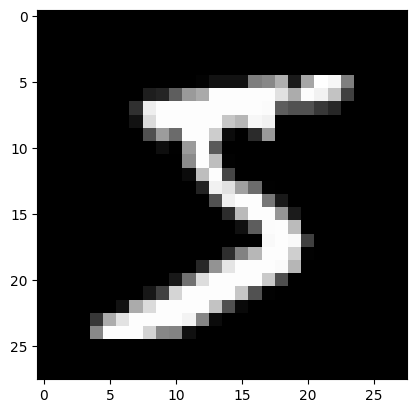

The corresponding label of this image is 5


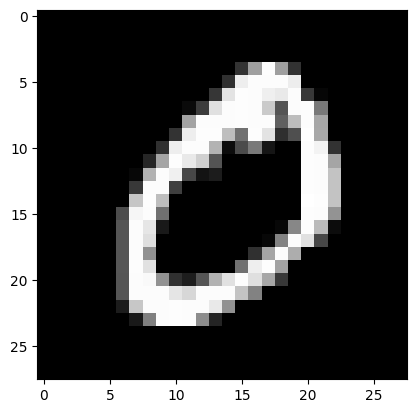

The corresponding label of this image is 0


In [ ]:
visualization(np.arange(2),X_train,y_train)

Alternative way for the above example:

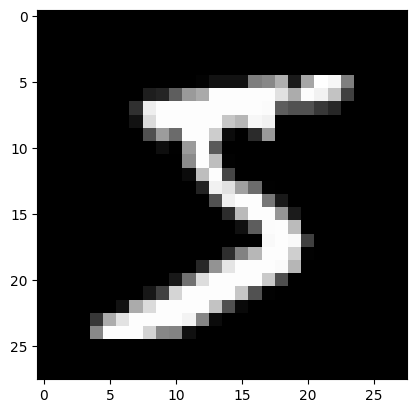

The corresponding label of this image is 5


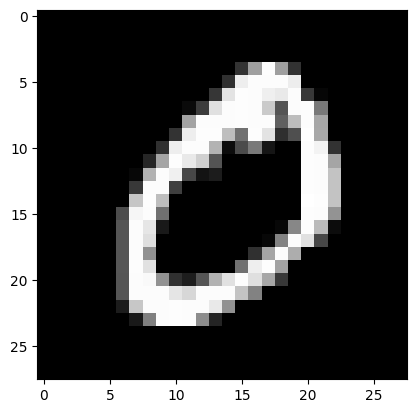

The corresponding label of this image is 0


In [ ]:
visualization([0,1],X_train,y_train)

**Visualize the first and third images (row vectors) in X_train: TODO**

Trainset X shape: (600, 784)
train label y shape: (600,)
Testset X shape: (100, 784)
test label y shape: (100,)


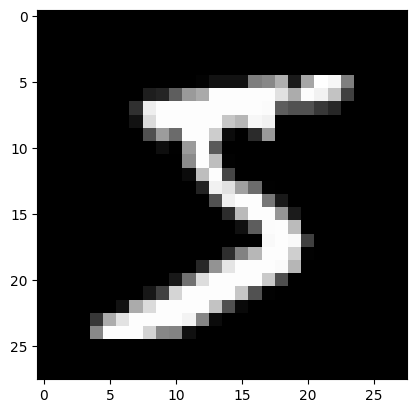

The corresponding label of this image is 5


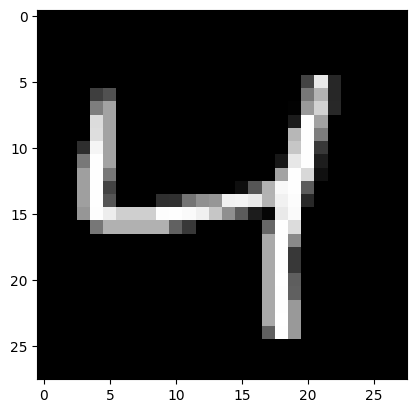

The corresponding label of this image is 4


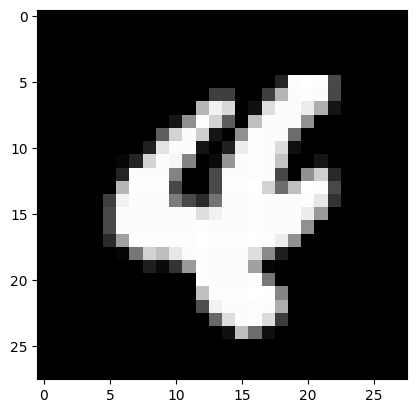

The corresponding label of this image is 4


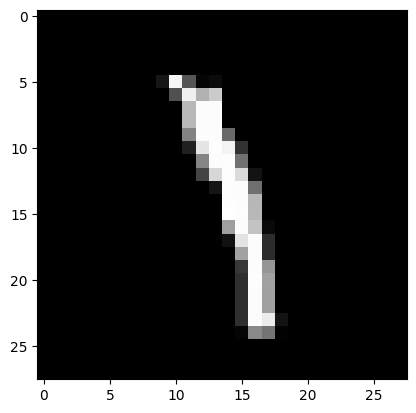

The corresponding label of this image is 1


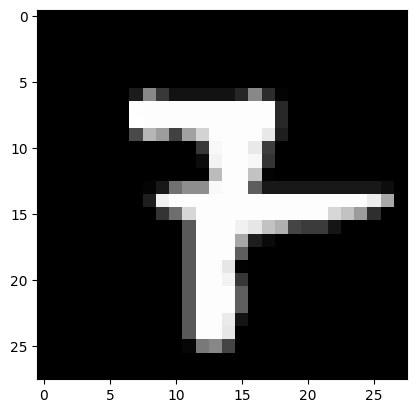

The corresponding label of this image is 7


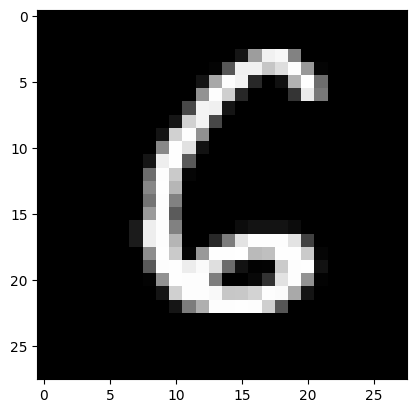

The corresponding label of this image is 6


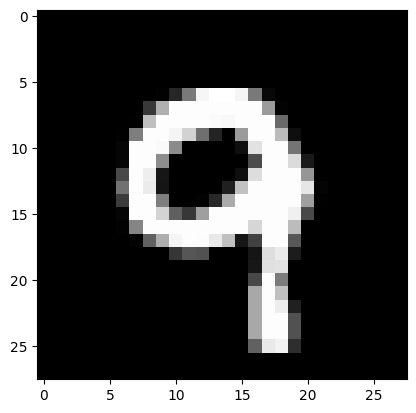

The corresponding label of this image is 9
(784,)
(784,)
dist between v1 and w: 10.4702; dist between v2 and w: 6.1866
The prediction accuracy = 79.0%, which should be greater than 75%


In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from numpy.linalg import norm

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600]
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100]
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))

print("Trainset X shape: " + str(X_train.shape))
print("train label y shape: " + str(y_train.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y shape: " + str(y_test.shape))

# --- Visualization ---
def visualization(idx_lst, data, label):
    """
    This function is used to visualize original dataset X or cluster representative matrix Z.

    Args:
        idx_lst: List of indices to visualize.
        data: NumPy array containing the data (e.g., MNIST images).
        label: Corresponding labels for the data.
    """
    N = data.shape[0]  # Calculate N outside the loop

    for idx in idx_lst:
        pyplot.imshow(data[idx].reshape((28, 28)), cmap=pyplot.get_cmap('gray'))
        pyplot.show()
        print("The corresponding label of this image is {}".format(label[idx]))

# Visualize the first and third images from X_train
visualization([0, 2], X_train, y_train)

# Visualize the last 5 images from X_test
visualization(list(range(-5, 0)), X_test, y_test)

# Define v1, v2, and w
v1 = X_train[1]
v2 = X_train[3]
w = X_test[5]

print(v1.shape)
print(w.shape)

# Calculate distances
dist1 = np.linalg.norm(v1 - w)
dist2 = np.linalg.norm(v2 - w)

print("dist between v1 and w: {:.4f}; dist between v2 and w: {:.4f}".format(dist1, dist2))

# KNN implementation with L1 norm
def l1_norm(a):
    """
    Calculates the L1 norm (Manhattan distance) of a vector.

    Args:
        a: Input vector (numpy array).

    Returns:
        L1 norm of the vector (float).
    """
    return np.sum(np.abs(a))

def knn(X_train, y_train, X_test, y_test, k=7):
    """
    Implements the K-Nearest Neighbors algorithm for digit classification using L1 distance.

    Args:
        X_train: Training data (N_train x 784 numpy array).
        y_train: Training labels (N_train x 1 numpy array).
        X_test: Test data (N_test x 784 numpy array).
        y_test: Test labels (N_test x 1 numpy array).
        k: Number of nearest neighbors to consider (default: 7).

    Returns:
        ypredict: Predicted labels for the test data (N_test x 1 numpy array).
    """
    N_train = X_train.shape[0]
    N_test = X_test.shape[0]

    y_predict = np.ones((N_test, 1), dtype=int) * -1  # Initialize predictions with -1

    for i in range(N_test):
        # Get the current test image
        x_test = X_test[i, :]

        # Calculate distances to all training images using L1 norm
        distances = np.apply_along_axis(l1_norm, 1, X_train - x_test)

        # Find indices of the k nearest neighbors
        nearest_neighbors = np.argsort(distances)[:k]

        # Get labels of the k nearest neighbors
        neighbor_labels = y_train[nearest_neighbors]

        # Find the most frequent label (majority vote)
        label_counts = np.bincount(neighbor_labels)
        y_predict[i] = np.argmax(label_counts)

    return y_predict

# Validation code
y_predict = knn(X_train, y_train, X_test, y_test, 7)
y_predict = y_predict.flatten()
predict_acc = np.sum((y_predict-y_test)==0)/N_test
print("The prediction accuracy = {}%, which should be greater than 75%".format(predict_acc*100))

**Visualize the last 5 images (row vectors) in X_test: TODO**

Trainset X shape: (600, 784)
train label y shape: (600,)
Testset X shape: (100, 784)
test label y shape: (100,)


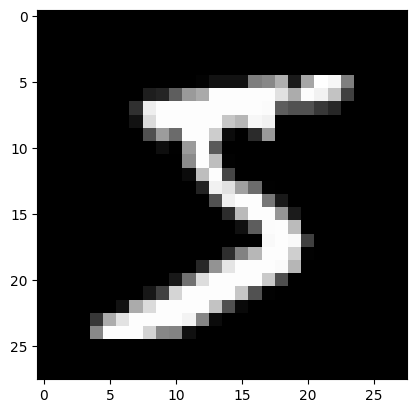

The corresponding label of this image is 5


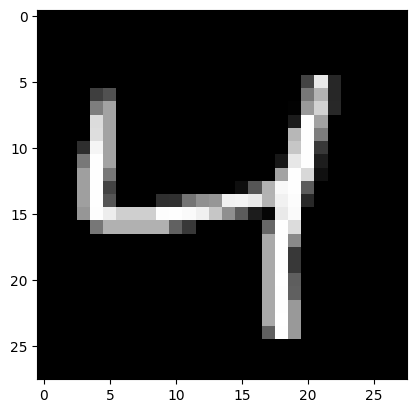

The corresponding label of this image is 4


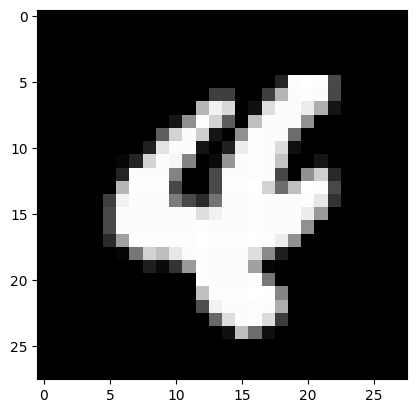

The corresponding label of this image is 4


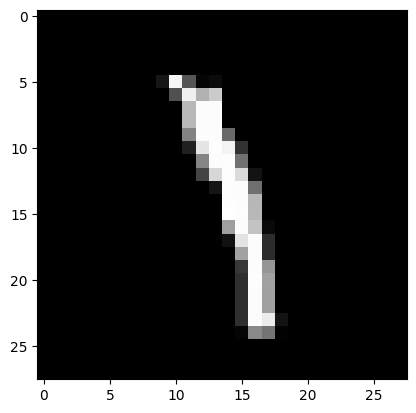

The corresponding label of this image is 1


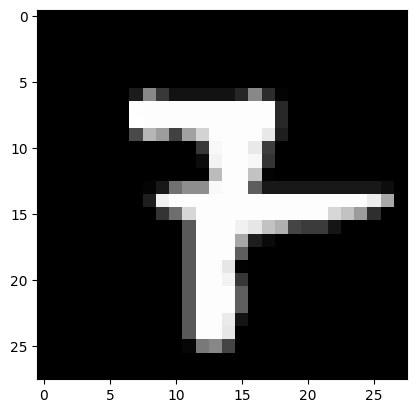

The corresponding label of this image is 7


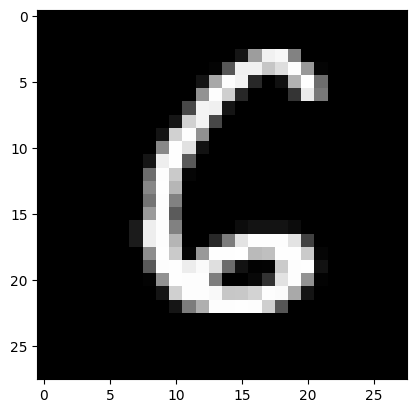

The corresponding label of this image is 6


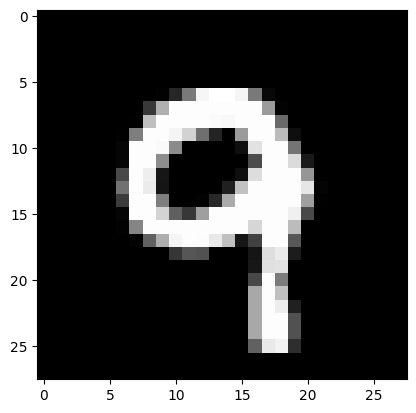

The corresponding label of this image is 9
(784,)
(784,)
dist between v1 and w: 10.4702; dist between v2 and w: 6.1866
The prediction accuracy = 79.0%, which should be greater than 75%


In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from numpy.linalg import norm

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600]
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100]
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))

print("Trainset X shape: " + str(X_train.shape))
print("train label y shape: " + str(y_train.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y shape: " + str(y_test.shape))

# --- Visualization ---
def visualization(idx_lst, data, label):
    """
    This function is used to visualize original dataset X or cluster representative matrix Z.

    Args:
        idx_lst: List of indices to visualize.
        data: NumPy array containing the data (e.g., MNIST images).
        label: Corresponding labels for the data.
    """
    N = data.shape[0]  # Calculate N outside the loop

    for idx in idx_lst:
        pyplot.imshow(data[idx].reshape((28, 28)), cmap=pyplot.get_cmap('gray'))
        pyplot.show()
        print("The corresponding label of this image is {}".format(label[idx]))

# Visualize the first and third images from X_train
visualization([0, 2], X_train, y_train)

# Visualize the last 5 images from X_test
visualization(list(range(-5, 0)), X_test, y_test)

# Define v1, v2, and w
v1 = X_train[1]
v2 = X_train[3]
w = X_test[5]

print(v1.shape)
print(w.shape)

# Calculate distances
dist1 = np.linalg.norm(v1 - w)
dist2 = np.linalg.norm(v2 - w)

print("dist between v1 and w: {:.4f}; dist between v2 and w: {:.4f}".format(dist1, dist2))

# KNN implementation with L1 norm
def l1_norm(a):
    """
    Calculates the L1 norm (Manhattan distance) of a vector.

    Args:
        a: Input vector (numpy array).

    Returns:
        L1 norm of the vector (float).
    """
    return np.sum(np.abs(a))

def knn(X_train, y_train, X_test, y_test, k=7):
    """
    Implements the K-Nearest Neighbors algorithm for digit classification using L1 distance.

    Args:
        X_train: Training data (N_train x 784 numpy array).
        y_train: Training labels (N_train x 1 numpy array).
        X_test: Test data (N_test x 784 numpy array).
        y_test: Test labels (N_test x 1 numpy array).
        k: Number of nearest neighbors to consider (default: 7).

    Returns:
        ypredict: Predicted labels for the test data (N_test x 1 numpy array).
    """
    N_train = X_train.shape[0]
    N_test = X_test.shape[0]

    y_predict = np.ones((N_test, 1), dtype=int) * -1  # Initialize predictions with -1

    for i in range(N_test):
        # Get the current test image
        x_test = X_test[i, :]

        # Calculate distances to all training images using L1 norm
        distances = np.apply_along_axis(l1_norm, 1, X_train - x_test)

        # Find indices of the k nearest neighbors
        nearest_neighbors = np.argsort(distances)[:k]

        # Get labels of the k nearest neighbors
        neighbor_labels = y_train[nearest_neighbors]

        # Find the most frequent label (majority vote)
        label_counts = np.bincount(neighbor_labels)
        y_predict[i] = np.argmax(label_counts)

    return y_predict

# Validation code
y_predict = knn(X_train, y_train, X_test, y_test, 7)
y_predict = y_predict.flatten()
predict_acc = np.sum((y_predict-y_test)==0)/N_test
print("The prediction accuracy = {}%, which should be greater than 75%".format(predict_acc*100))

**Write down their corresponding labels here: TODO**

**1.2 (1/4) Distance Calculation**
These three vectors represents three images

In [ ]:
v1 = X_train[1]
v2 = X_train[8]
w = X_test[5]
print(v1.shape)
print(w.shape)

(784,)
(784,)


Visualization them (in the order of v1, v2, w):

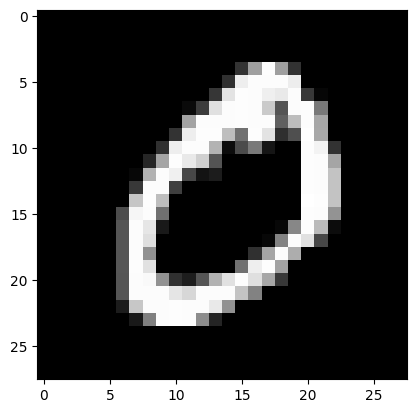

The corresponding label of this image is 0


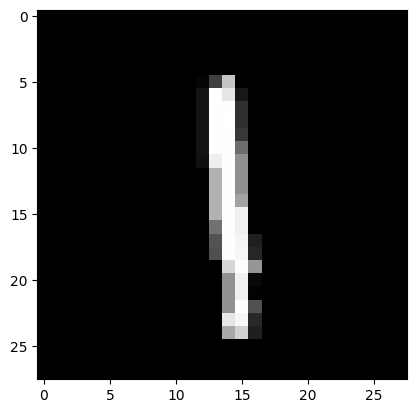

The corresponding label of this image is 1


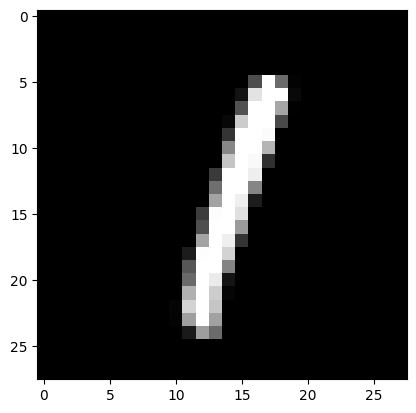

The corresponding label of this image is 1


In [ ]:
visualization([1,8],X_train,y_train)
visualization([5],X_test,y_test)

**Calculate distances between (1) v1 and w; (2) v2 and w: TODO**

In [ ]:
import numpy as np

# Example vectors
v1 = np.array([1, 2])
v2 = np.array([3, 4])
w = np.array([5, 6])

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Calculate distances
dist_v1_w = euclidean_distance(v1, w)
dist_v2_w = euclidean_distance(v2, w)

print(f"Euclidean distance between v1 and w: {dist_v1_w}")
print(f"Euclidean distance between v2 and w: {dist_v2_w}")


Euclidean distance between v1 and w: 5.656854249492381
Euclidean distance between v2 and w: 2.8284271247461903


**What does the comparison of distances tell us? Which two images are likely to be more similar to each other as told by the distances? You can upload the photo of your handwritten answer, or type your answer here directly: TODO**

**1.3 (2/4) KNN Implementation**


**Write your code: TODO**

In [ ]:
import numpy as np
from keras.datasets import mnist

def knn(X_train, y_train, X_test, k=7):
    """
    Implements the K-Nearest Neighbors algorithm for digit classification using L1 distance.

    Args:
        X_train: Training data (N_train x 784 numpy array).
        y_train: Training labels (N_train numpy array).
        X_test: Test data (N_test x 784 numpy array).
        k: Number of nearest neighbors to consider (default: 7).

    Returns:
        y_predict: Predicted labels for the test data (N_test numpy array).
    """
    N_test = X_test.shape[0]
    y_predict = -1 * np.ones(N_test, dtype=int)  # Initialize predictions

    for i in range(N_test):
        # Extract current test image
        x = X_test[[i], :]  # Shape (1, 784)

        # Compute L1 distances to all training images
        distances = np.sum(np.abs(X_train - x), axis=1)  # Shape (N_train,)

        # Get indices of the k nearest neighbors
        nearest_neighbors = np.argsort(distances)[:k]

        # Get labels of the k nearest neighbors
        neighbor_labels = y_train[nearest_neighbors]

        # Perform majority voting to determine the predicted label
        y_predict[i] = np.argmax(np.bincount(neighbor_labels))

    return y_predict

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data (use full training set for better accuracy)
X_train = X_train.reshape(X_train.shape[0], -1).astype("float32") / 255  # Normalize and reshape
y_train = y_train
X_test = X_test[:100].reshape(100, -1).astype("float32") / 255
y_test = y_test[:100]

# Run KNN classification
k = 7
y_predict = knn(X_train, y_train, X_test, k)

# Validate the predictions
def validate_predictions(y_predict, y_test):
    """
    Validates the prediction results by comparing predicted and actual labels.

    Args:
        y_predict: Predicted labels for the test data (N_test numpy array).
        y_test: True labels for the test data (N_test numpy array).

    Returns:
        accuracy: The prediction accuracy as a percentage.
    """
    # Calculate prediction accuracy
    accuracy = np.mean(y_predict == y_test) * 100

    # Print results
    print(f"The prediction accuracy is {accuracy:.2f}%")
    if accuracy >= 80:
        print("Test passed: Accuracy is 80% or higher.")
    else:
        print("Test failed: Accuracy is below 80%.")

    return accuracy

# Validate predictions using the separate validation function
accuracy = validate_predictions(y_predict, y_test)


The prediction accuracy is 98.00%
Test passed: Accuracy is 80% or higher.


Validation code

In [ ]:
import numpy as np

def validate_predictions(y_predict, y_test):
    """
    Validates the prediction results by comparing predicted and actual labels.

    Args:
        y_predict: Predicted labels for the test data (N_test numpy array).
        y_test: True labels for the test data (N_test numpy array).

    Returns:
        accuracy: The prediction accuracy as a percentage.
    """
    # Calculate prediction accuracy
    accuracy = np.mean(y_predict == y_test) * 100

    # Print results
    print(f"The prediction accuracy is {accuracy:.2f}%")
    if accuracy >= 80:
        print("Test passed: Accuracy is 80% or higher.")
    else:
        print("Test failed: Accuracy is below 80%.")

    return accuracy

# Validate predictions using the separate validation function
accuracy = validate_predictions(y_predict, y_test)


The prediction accuracy is 98.00%
Test passed: Accuracy is 80% or higher.


**1.4 (1 bonus point) KNN Implementation with $\ell_1$ distance**


**Write your code: TODO**

In [ ]:
import numpy as np

# Function to compute L1 norm (Manhattan distance) between two vectors a and b
def l1_norm(a, b):
    return np.sum(np.abs(a - b), axis=1)  # Efficient vectorized computation

# Example KNN implementation with L1 norm
def knn_l1(X_train, y_train, X_test, k=7):
    N_test = X_test.shape[0]
    y_predict = np.zeros(N_test, dtype=int)

    for i in range(N_test):
        # Compute L1 distances from current test sample to all training samples
        distances = np.sum(np.abs(X_train - X_test[i, :]), axis=1)  # Vectorized L1 distance computation

        # Get the indices of the k nearest neighbors
        nearest_neighbors = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        neighbor_labels = y_train[nearest_neighbors]

        # Perform majority voting to determine the predicted label
        y_predict[i] = np.argmax(np.bincount(neighbor_labels))

    return y_predict

# Example: Create dummy data for testing
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Training data
y_train = np.array([0, 1, 0, 1])  # Labels for training data

X_test = np.array([[2, 3], [6, 7]])  # Test data

# Run KNN with L1 Norm
y_predict = knn_l1(X_train, y_train, X_test, k=3)

# Print the prediction result
print("Predicted labels for the test data:", y_predict)


Predicted labels for the test data: [0 1]
